In [118]:
import pandas as pd
import os
import zipfile as zf
import openpyxl as pxl
from numpy import linspace
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
wrkbk = pxl.load_workbook('./EC_interface_2050.xlsx')
cntrl = wrkbk['Control']

wrkbk_1 = wrkbk
wrkbk_1['Control']['B1'] = 'OPEX'

wrkbk_1.save('./test.xlsx')


First we will load the results files with the two ends of the Capex vs Opex Results

In [72]:
def get_info(path):
    folder = zf.ZipFile(path,'r')
    file = folder.open('performance.csv')
    df = pd.read_csv(file, delimiter=r'\t', engine='python')
    row = {
        'CAPEX':df.loc[df.Indicator == 'CAPEX']['Value [MCHF/y]'].values[0],
        'OPEX':df.loc[df.Indicator == 'OPEX']['Value [MCHF/y]'].values[0],
        'TOTEX':df.loc[df.Indicator == 'TOTEX']['Value [MCHF/y]'].values[0],
        'GWP_op':df.loc[df.Indicator == 'GWP_op']['Value [MCHF/y]'].values[0],
        'GWP_total':df.loc[df.Indicator == 'GWP_total']['Value [MCHF/y]'].values[0],
    }
    return row


In [ ]:
for root, dirs, files in os.walk('./Pareto_Front/'):
    print(files)


In [ ]:
cost_H_high = 3.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]
cost_H_low = 1.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]
H_range = linspace(cost_H_low,cost_H_high,num=4).tolist()
H_range = [0] + H_range
H_range

In [ ]:
site = 'https://ipese-lectures.epfl.ch/energy-conversion/project/'

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
  
# Create the webdriver object. Here the 
# chromedriver is present in the driver 
# folder of the root directory.
driver = webdriver.Chrome(r"./driver/chromedriver")
  
# get https://www.geeksforgeeks.org/
driver.get(site)
  
# Maximize the window and let code stall 
# for 10s to properly maximise the window.
driver.maximize_window()
time.sleep(10)
  
# Obtain button by link text and click.
upload_excel = driver.find_element(By.XPATH,
'/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/input').send_keys(
    r'C:\Users\aliwa\ECRE2022\ECRE\Milestone 2\Question 4\EC_interface_2050.xlsx'
)

#download = driver.find_element(By.XPATH,


In [ ]:
download = driver.find_element(By.XPATH,
    '/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[5]/div/div[3]/a')
download.click()

In [ ]:
buttons = driver.find_element(By.ID)

In [ ]:
source_path = r'C:\Users\aliwa\Downloads\Gold_results.zip'
destination_path = r'C:\Users\aliwa\ECRE2022\ECRE\Milestone 2\Question 4\Gold_results.zip'
os.rename(source_path,destination_path)

This is where the code will start

First we will make all of the file folders with the open capex and opex files and a results file to collect the results

In [ ]:
cost_H_high = 3.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]
cost_H_low = 1.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]
H_range = linspace(cost_H_low,cost_H_high,num=4).tolist()

#create the hydrogen varied excels
for x in H_range:
    value = round(x,4)
    folder = f'hydrogen_{value}'
    wrkbk = pxl.load_workbook('./EC_interface_2050.xlsx')
    wrkbk_1 = wrkbk
    wrkbk_1['Control']['B1'] = 'OPEX'
    wrkbk_1['Resources']['C14'] = 100000
    wrkbk_1['Resources']['D14'] = value
    file_path = f'./Pareto_Front/{folder}'
    if not os.path.isdir(file_path):
        os.makedirs(file_path)
        os.makedirs(file_path+'/results')
    wrkbk_1.save(f'./Pareto_Front/{folder}/EC_2050_hydrogen_{value}_OPEX_open.xlsx')
    wrkbk_1 = wrkbk
    wrkbk_1['Control']['B1'] = 'CAPEX'
    wrkbk_1['Resources']['C14'] = 100000
    wrkbk_1['Resources']['D14'] = value
    wrkbk_1.save(f'./Pareto_Front/{folder}/EC_2050_hydrogen_{value}_CAPEX_open.xlsx')

Now we will define a function that given a driver will upload, download and transfer a file to the required folder

In [ ]:
site = 'https://ipese-lectures.epfl.ch/energy-conversion/project/'

driver = webdriver.Chrome(r"./driver/chromedriver")
driver.get(site)
driver.maximize_window()
time.sleep(10)

for folder in os.listdir('./Pareto_Front/'):
    results_path = (os.getcwd().replace('\\', '/')+f'/Pareto_Front/{folder}/results/').replace('c:/','C:/' )
    for file in os.listdir(f'./Pareto_Front/{folder}/'):
        if os.path.isfile(f'./Pareto_Front/{folder}/{file}'):
            file_path = (os.getcwd()+f'\\Pareto_Front\\{folder}\\{file}').replace('c:\\','C:\\' )
            file_name = file.strip('.xlsx')
            download_path = f'C:/Users/aliwa/Downloads/{file_name}_results.zip'
            print(file_path)
            print(results_path)
            print(file_name)
            print(download_path)
            time.sleep(2)
            input_name = driver.find_element(By.ID, 'project-name-input').clear()
            input_name = driver.find_element(By.ID, 'project-name-input').send_keys(file_name)
            time.sleep(1)
            upload_excel = driver.find_element(By.XPATH,
                '/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/input').send_keys(file_path)
                #'/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/button
                #'/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/input
            time.sleep(12)

            download = driver.find_element(By.XPATH,
                '/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[5]/div/div[3]/a')
            download.click()
            time.sleep(5)
            os.rename(download_path,results_path+file_name+'_results.zip')



Make another directory for the other files

In [59]:
for folder in os.listdir('./Pareto_Front/'):
    if not os.path.exists(os.getcwd()+f'\\Pareto_Front\\{folder}\\results_con\\'):
        os.mkdir(os.getcwd()+f'\\Pareto_Front\\{folder}\\results_con\\')


Now we have to read and make the new excel files

In [100]:

for folder in os.listdir('./Pareto_Front/'):
    data = []
    for folder_2 in os.listdir(os.getcwd()+f'\\Pareto_Front\\{folder}\\results\\'):
        data.append(get_info(os.getcwd()+f'\\Pareto_Front\\{folder}\\results\\{folder_2}'))
    df = pd.DataFrame(data)
    Capex_max = float(df.CAPEX.max())
    Capex_min = float(df.CAPEX.min())
    Opex_max = float(df.OPEX.max())
    Opex_min = float(df.OPEX.min())
    cap_range = linspace(Capex_min,Capex_max,num=7).tolist()[1:-1]
    op_range = linspace(Opex_min,Opex_max,num=7).tolist()[1:-1]

    #create the hydrogen varied excels EC_2050_hydrogen_0.037_CAPEX_open.xlsx
    for x in cap_range:
        value = int(x)
        wrkbk = pxl.load_workbook(f'./Pareto_Front/{folder}/EC_2050_{folder}_OPEX_open.xlsx')
        wrkbk_1 = wrkbk
        wrkbk_1['Control']['B4'] = value
        file_path = f'./Pareto_Front/{folder}'
        if not os.path.isdir(f'./Pareto_Front/{folder}/constrained'):
            os.makedirs(f'./Pareto_Front/{folder}/constrained')
        wrkbk_1.save(f'./Pareto_Front/{folder}/constrained/EC_2050_{folder}_OPEX_open_CAPEX_{value}.xlsx')
    
    for x in op_range:
        value = int(x)
        wrkbk = pxl.load_workbook(f'./Pareto_Front/{folder}/EC_2050_{folder}_CAPEX_open.xlsx')
        wrkbk_1 = wrkbk
        wrkbk_1['Control']['B5'] = value
        file_path = f'./Pareto_Front/{folder}'
        if not os.path.isdir(f'./Pareto_Front/{folder}/constrained'):
            os.makedirs(f'./Pareto_Front/{folder}/constrained')
        wrkbk_1.save(f'./Pareto_Front/{folder}/constrained/EC_2050_{folder}_CAPEX_open_OPEX_{value}.xlsx')


c:\Users\aliwa\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Now that we have all of the files created we need to run them through the web interface, we can run similar code as before

In [104]:
from tqdm import tqdm
site = 'https://ipese-lectures.epfl.ch/energy-conversion/project/'

driver = webdriver.Chrome(r"./driver/chromedriver")
driver.get(site)
driver.maximize_window()
time.sleep(10)

for folder in os.listdir('./Pareto_Front/'):
    results_path = (os.getcwd().replace('\\', '/')+f'/Pareto_Front/{folder}/results_con/').replace('c:/','C:/' )
    for file in tqdm(os.listdir(f'./Pareto_Front/{folder}/constrained/')):
        if os.path.isfile(f'./Pareto_Front/{folder}/constrained/{file}'):
            file_path = (os.getcwd()+f'\\Pareto_Front\\{folder}\\constrained\\{file}').replace('c:\\','C:\\' )
            file_name = file.strip('.xlsx')
            download_path = f'C:/Users/aliwa/Downloads/{file_name}_results.zip'
            # print(file_path)
            # print(results_path)
            # print(file_name)
            # print(download_path)
            time.sleep(2)
            input_name = driver.find_element(By.ID, 'project-name-input').clear()
            input_name = driver.find_element(By.ID, 'project-name-input').send_keys(file_name)
            time.sleep(1)
            upload_excel = driver.find_element(By.XPATH,
                '/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/input').send_keys(file_path)
                #'/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/button
                #'/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[2]/div/div[1]/div/div/input
            cont = input('cont?')

            download = driver.find_element(By.XPATH,
                '/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[5]/div/div[3]/a')
            download.click()
            time.sleep(3)
            os.rename(download_path,results_path+file_name+'_results.zip')



C:\Users\aliwa\AppData\Local\Temp\ipykernel_8324\3862136078.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"./driver/chromedriver")
100%|██████████| 10/10 [02:12<00:00, 13.20s/it]


Now that we have all of the data all that is left to do is make the fronts!

In [138]:
data = []
for folder in os.listdir('./Pareto_Front/'):
    for folder_2 in os.listdir(f'./Pareto_Front/{folder}/results_con'):
        row = get_info(os.getcwd()+f'\\Pareto_Front\\{folder}\\results_con\\{folder_2}')
        row['simulation'] = folder.title().replace('_',' ')
        data.append(row)
    for folder_3 in os.listdir(f'./Pareto_Front/{folder}/results'):
        row = get_info(os.getcwd()+f'\\Pareto_Front\\{folder}\\results\\{folder_3}')
        row['simulation'] = folder.title().replace('_',' ')
        data.append(row)

df = pd.DataFrame(data)
df.head()

,CAPEX,OPEX,TOTEX,GWP_op,GWP_total,simulation
0,6913.87,13463.00,20376.87,21927.55,22729.85,Hydrogen 0.037
1,6887.22,18082.00,24969.22,27828.60,28628.00,Hydrogen 0.037
2,6887.22,22676.25,29563.47,31270.38,32069.79,Hydrogen 0.037
3,6887.22,27319.00,34206.22,35784.66,36584.06,Hydrogen 0.037
4,7096.03,8845.00,15941.03,17333.82,18154.40,Hydrogen 0.037


Now that we have the data all that is left (thankfully) is to make it into a figure!

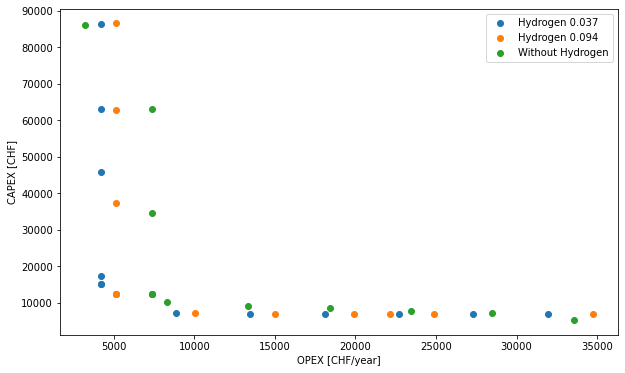

In [178]:
for col in ['CAPEX','OPEX','TOTEX','GWP_op','GWP_total']:
    df[col] =pd.to_numeric(df[col])


sims = df.loc[df.simulation.isin(['Hydrogen 0.037', 'Hydrogen 0.094', 'Without Hydrogen'])].groupby('simulation')

plt.figure(figsize=(10,6))
plt.xlabel('OPEX [CHF/year]')
plt.ylabel('CAPEX [CHF]')

for sim, data in sims:
    fig = plt.scatter(x=data.OPEX, y=data.CAPEX)
    fig.set_label(sim)
plt.legend()
plt.savefig('./Pareto_Front.png')

In [179]:
cost_H_high = 3.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]
cost_H_low = 1.3*0.94/33 #[USD/kg]*[CHF/USD]/[kWh/kg_H] = [CHF/kWh]

print(cost_H_high, cost_H_low)

0.094 0.03703030303030303
